In [1]:
%matplotlib inline
import numpy as np
import lib.io.stan
import lib.plots.stan
import matplotlib.pyplot as plt
import os
from matplotlib.lines import Line2D
import retro_prepare
import matplotlib.colors

In [2]:
!ls /Users/huifang.wang/RetrospectiveData/results/

ls: cannot access /Users/huifang.wang/RetrospectiveData/results/: No such file or directory


In [83]:
#patient_id = 'id030_bf'
#patient_id = 'id003_mg'
#patient_id = 'id013_lk'
hpf = 10
lpf = 0.05
'''
patient_id = 'id004_bj'
szr_name = 'BJcrise1le161128B-BEX_0002'

patient_id = 'id010_cmn'
szr_name = 'CMN_crise4P_140320B-DEX_0008'


patient_id = 'id017_mk'
szr_name = "MK_crise1Part1_170328C-BEX_0004_MK_crise1Part2_170328C-BEX_0007"


patient_id = 'id020_lma'
szr_name = 'LM_crise3P_100415b-bex_0005'

patient_id = 'id025_mc'
szr_name = 'MC_C1_Part1_080429ccex_0002_MC_C1_Part2_080429ccex_0003'

patient_id = 'id050_sx'
szr_name = 'SX_C4P_111202C-EEX_0002'


patient_id = 'id022_te'
szr_name = 'TE_crise2P_130306C-BEX_0000'

patient_id = 'id027_sj'
szr_name = 'SJ_crise1PSG_120214D-CEX_0003'



patient_id = 'id030_bf'
szr_name = 'BF_crise1P_110831B-CEX_0004'


patient_id = 'id039_mra'
szr_name = 'MR_C4P_170124b-cex_0028'

patient_id = 'id013_lk'
szr_name = 'LK_crise1P_160707A-AEX_0013'
'''

#szr_name = "MK_crise2_PSG_170328C-CEX_0002"
#szr_name = 'LK_crise4P_160707A-BEX_0002'
#data_dir = f'/Users/huifang.wang/RetrospectiveData/results/{patient_id}'
results_dir = f'/home/hfw/Retro/results/{patient_id}'
#szr_name = 'BF_crise1P_110831B-CEX_0004'
#szr_name = 'BF_crise1P_110831B-CEX_0004'
#szr_name = 'MGcriseP2+G'
#szr_name = "MK_crise2_PSG_170328C-CEX_0002"
#szr_name = 'BTcrise2appportable_0013'
#szr_name = 'BTcrise1appportable_0006'
meta_data_fname = f'{szr_name}.json'
#raw_seeg_fname = f'{szr_name}.raw.fif'
fname_suffix = f'{szr_name}'
# if os.path.isdir(results_dir):
#     os.rmdir(results_dir)
#os.makedirs(results_dir,exist_ok=True)
os.makedirs(f'{results_dir}/figuresBT/',exist_ok=True)
##os.makedirs(f'{results_dir}/Rfiles', exist_ok=True)

In [84]:

# ezdelay, ezhyp, PUni
fname_suffix = f'{szr_name}_hpf{hpf}_lpf{lpf}_ezdelay'

raw_seeg_fname = f'{szr_name}.raw.fif'
#data_mono = retro_prepare_data.prepare_data(data_dir, meta_data_fname, raw_seeg_fname, szr_name, hpf, lpf)
#raw_seeg_fname = f'{szr_name}.bip.raw.fif'
#data = retro_prepare.prepare_data_bip(data_dir, meta_data_fname, raw_seeg_fname, szr_name, hpf, lpf)
#fname_suffix += f'_hpf{hpf}_lpf{lpf}'

In [85]:
#seeg, bip = retro_prepare.read_one_seeg(data_dir, meta_data_fname, raw_seeg_fname)
#slp = retro_prepare.compute_slp(seeg, bip, hpf, lpf)

In [86]:
import mne
import pandas as pd
import re

In [87]:
data=lib.io.stan.rload(f'{results_dir}/Rfiles/fit_data_{fname_suffix}.R')

In [88]:
def read_vep_mrtrix_lut():
    roi_names = []
    with open('./data/VepMrtrixLut.txt', 'r') as fd:
        for line in fd.readlines():
            i, roi_name, *_ = line.strip().split()
            roi_names.append(roi_name)
            #roi_name_to_index[roi_name.lower()] = int(i) - 1
    return roi_names
roi = read_vep_mrtrix_lut()
roi=roi[1:]


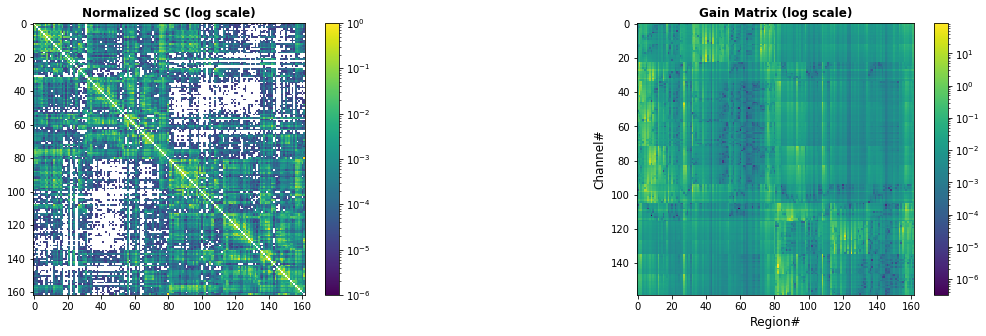

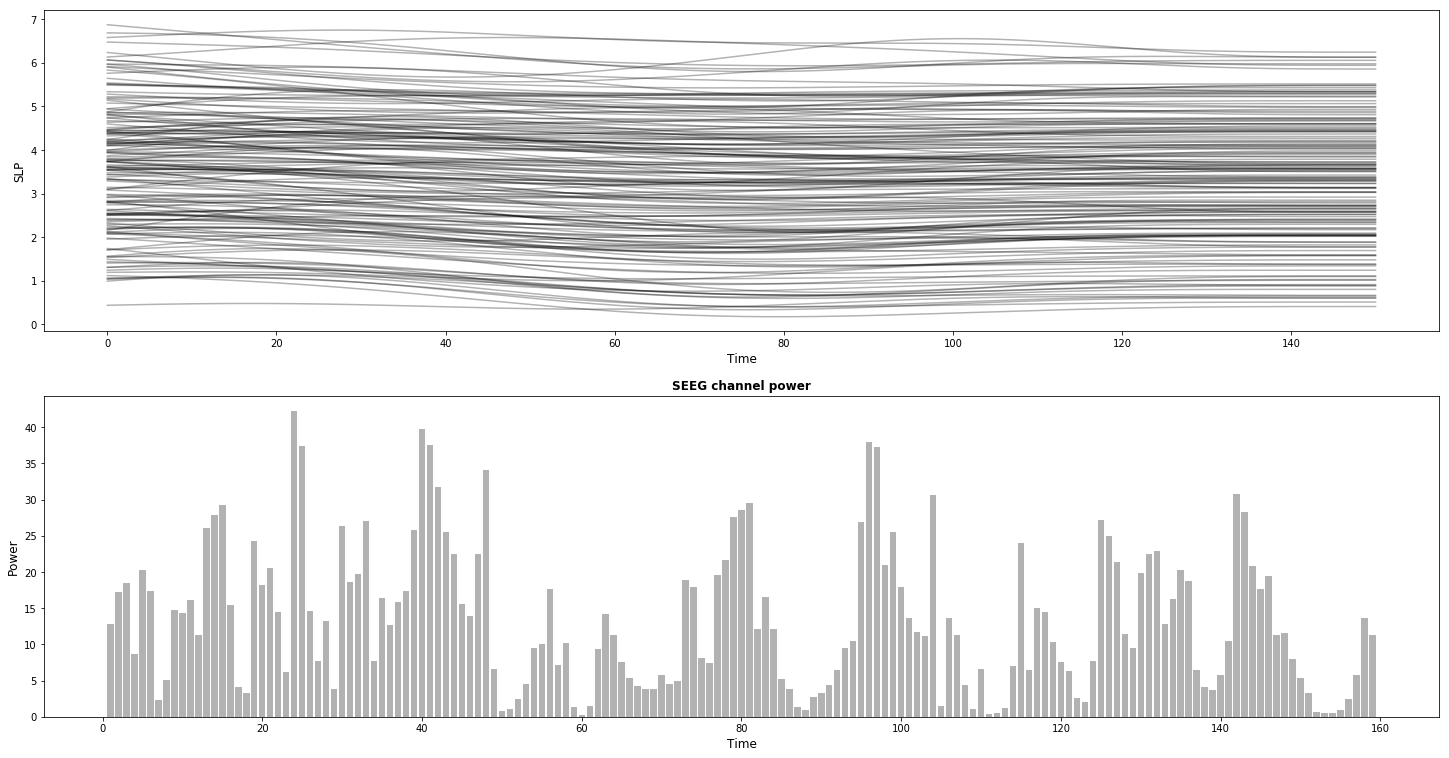

In [89]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.imshow(data['SC'],norm=matplotlib.colors.LogNorm(vmin=1e-6, vmax=data['SC'].max()));
plt.colorbar(fraction=0.046,pad=0.04);
plt.title('Normalized SC (log scale)',fontsize=12, fontweight='bold')

plt.subplot(122)
plt.imshow(data['gain'],norm=matplotlib.colors.LogNorm(vmin=data['gain'].min(), vmax=data['gain'].max()));
plt.colorbar(fraction=0.046,pad=0.04);
plt.xlabel('Region#', fontsize=12)
plt.ylabel('Channel#', fontsize=12)
plt.title('Gain Matrix (log scale)',fontsize=12, fontweight='bold')
plt.savefig(f'{results_dir}/figures/network.png')

plt.figure(figsize=(25,13))
plt.subplot(211)
plt.plot(data['slp'], color='black', alpha=0.3);
plt.xlabel('Time', fontsize=12)
plt.ylabel('SLP', fontsize=12)

plt.subplot(212)
plt.bar(np.r_[1:data['ns']+1],data['snsr_pwr'], color='black', alpha=0.3);
plt.xlabel('Time', fontsize=12)
plt.ylabel('Power', fontsize=12)
plt.title('SEEG channel power', fontweight='bold')
plt.savefig(f'{results_dir}/figuresBT/fitting_target_{fname_suffix}.png')
# plt.tight_layout()



chains = [1,2,3,4]
for i,chain_no in enumerate(chains):
    pstr_samples = lib.io.stan.read_samples([f'{results_dir}/samples_{fname_suffix}_chain{chain_no}.csv'])

    print(pstr_samples['x0'],pstr_samples['tau0'])

ns=162
vep_smax = np.zeros(ns)
for ibip_elec, indroi_iv in zip(bip.ch_names,np.argmax(data['gain'],axis=1)):
   
    print(ibip_elec, ': ', roi[indroi_iv])

In [90]:
import matplotlib.gridspec as gridspec

In [91]:
import json
with open(f'./data/ei-vep.json','r') as f:
    ezh_all = json.load(f)
ind_ez = ezh_all[patient_id]['i_ez']
ind_pz = ezh_all[patient_id]['i_pz']



pstr_samples = lib.io.stan.read_samples([f'{results_dir}/samples_{fname_suffix}_chain{chain_no}.csv'])
lib.plots.stan.x0_violin_patient(pstr_samples['x0'], ind_ez, figsize=(25,5), figname=f'{results_dir}/figures/x0_violin_{fname_suffix}_chain{chain_no}.png')
lib.plots.stan.pair_plots(pstr_samples, ['tau0', 'amplitude', 'offset', 'K', 'eps_slp', 'eps_snsr_pwr', 'x_init', 'z_init'],
                          figname=f'{results_dir}/figures/params_pair_plots_{fname_suffix}_chain{chain_no}.png')
lib.plots.stan.plot_source(pstr_samples['x'].mean(axis=0), pstr_samples['z'].mean(axis=0), ind_ez, ind_pz,
                           figname=f'{results_dir}/figures/posterior_predicted_src_{fname_suffix}_chain{chain_no}.png')
#lib.plots.stan.plot_feature(pstr_samples['mu_slp'].mean(axis=0),ez_hyp, pz_hyp,
                           #figname=f'{results_dir}/figures/posterior_predicted_muslp_{fname_suffix}_chain{chain_no}.png', giveylable='out slp', givetitle='Predictive slp')
lib.plots.stan.plot_fit_target({'slp':pstr_samples['mu_slp'].mean(axis=0), 'snsr_pwr':pstr_samples['mu_snsr_pwr'].mean(axis=0)},
                               data, figname=f'{results_dir}/figures/posterior_predicted_slp_{fname_suffix}_chain{chain_no}.png')



In [92]:
all_fb_d0=np.load(f'{results_dir}/EZdelay/ez_prior_{szr_name}.npy')
d0_prior=np.mean(all_fb_d0,axis=0)
ez_prior=np.where(d0_prior>0.5)
VEP_A_BT = all_fb_d0

# Plot one 

import matplotlib.gridspec as gridspec
pstr_samples = lib.io.stan.read_samples([f'{results_dir}/samples_{fname_suffix}_chain1.csv'])
figsize = [30,20]
x0_infer = pstr_samples['x0']
ns = x0_infer.shape[1]
plt.figure(figsize=figsize)
gs = gridspec.GridSpec(3,1,hspace = 3)
#ax = plt.subplot(3,1,2)


#plt.figure(figsize=figsize)
#gs = gridspec.GridSpec(1,2,width_ratios = [1,8])

#ax = plt.subplot(3,1,1)
ax=plt.subplot(gs[0,0])
barlist=plt.bar(np.arange(0, ns), d0_prior, color='black', alpha=0.3)
plt.xticks(np.r_[:len(roi)], roi, rotation = 90);

for ichanvep in ezh_all[patient_id]['i_ez']:
    plt.gca().get_xticklabels()[ichanvep].set_color('red')
    barlist[ichanvep].set_color('r')
for ichanvep in ezh_all[patient_id]['i_pz']:
    plt.gca().get_xticklabels()[ichanvep].set_color('blue')
    barlist[ichanvep].set_color('blue')
plt.title('A. $VEP_A$: delay on frequency powers', fontsize = 26);
ax.axhline(0.5)
plt.xlim([-1,163])

ax=plt.subplot(gs[1,0])
barlist=plt.bar(np.arange(0, ns), x0_infer[0]+7, color='black', alpha=0.3)
plt.xticks(np.r_[:len(roi)], roi, rotation = 90);
ax.axhline(-1.6+7)
for ichanvep in ezh_all[patient_id]['i_ez']:
    plt.gca().get_xticklabels()[ichanvep].set_color('red')
    barlist[ichanvep].set_color('r')
for ichanvep in ezh_all[patient_id]['i_pz']:
    plt.gca().get_xticklabels()[ichanvep].set_color('blue')
    barlist[ichanvep].set_color('blue')
plt.title('B. $VEP_B$:  Optimized x0', fontsize = 26)       
plt.xlim([-1,163])
ax.set_yticklabels(item-7. for item in ax.get_yticks())


ax=plt.subplot(gs[2,0])
#ax = plt.subplot(3,1,3)
#plt.figure(figsize=figsize)
barlist=plt.bar(np.arange(0, ns), ez_pred, color='black', alpha=0.3)
plt.xticks(np.r_[:len(roi)], roi, rotation = 90);

for ichanvep in ezh_all[patient_id]['i_ez']:
    plt.gca().get_xticklabels()[ichanvep].set_color('red')
    barlist[ichanvep].set_color('r')
for ichanvep in ezh_all[patient_id]['i_pz']:
    plt.gca().get_xticklabels()[ichanvep].set_color('blue')
    barlist[ichanvep].set_color('blue')
plt.title('C. $VEP_C$: delay on predicted x value', fontsize = 26);
plt.xlim([-1,163])

figname=f'{results_dir}/figuresBT/Vep3value_{fname_suffix}.png'
plt.suptitle(f'{patient_id}: {fname_suffix}',x=0.2, y=.95, fontsize = 16, color='blue')
plt.savefig(figname)

In [93]:

VEP_B_BT = []
VEP_C_BT = []
for ii in np.arange(1,100):
    csv_path = f'{results_dir}/OptimalBT/samples_fit_data_{fname_suffix}_{ii}.csv'
    #csv_path = f'{results_dir}/OptimalBT/samples_fit_data_{fname_suffix}_hpf10_lpf0.05_ezdelay_{ii}.csv'
    optima = lib.io.stan.read_samples([csv_path])
    x0_infer = optima['x0']
    VEP_B_BT.append(x0_infer)
    onst_thrshld=0.0

    x = optima['x'].mean(axis=0)
    nn = x.shape[1]
    onsets = 200*np.ones(nn)
    for indnn in range(nn):
        xt = x[:,indnn] > onst_thrshld
        if(xt.any()):
            onsets[indnn] = np.where(x[:,indnn] > onst_thrshld)[0][0]
    ez_pred = -np.log((onsets+1)/(200+1))
    VEP_C_BT.append(ez_pred)


VEP_B_BT=np.squeeze(VEP_B_BT)

VEP_C_BT=np.array(VEP_C_BT)

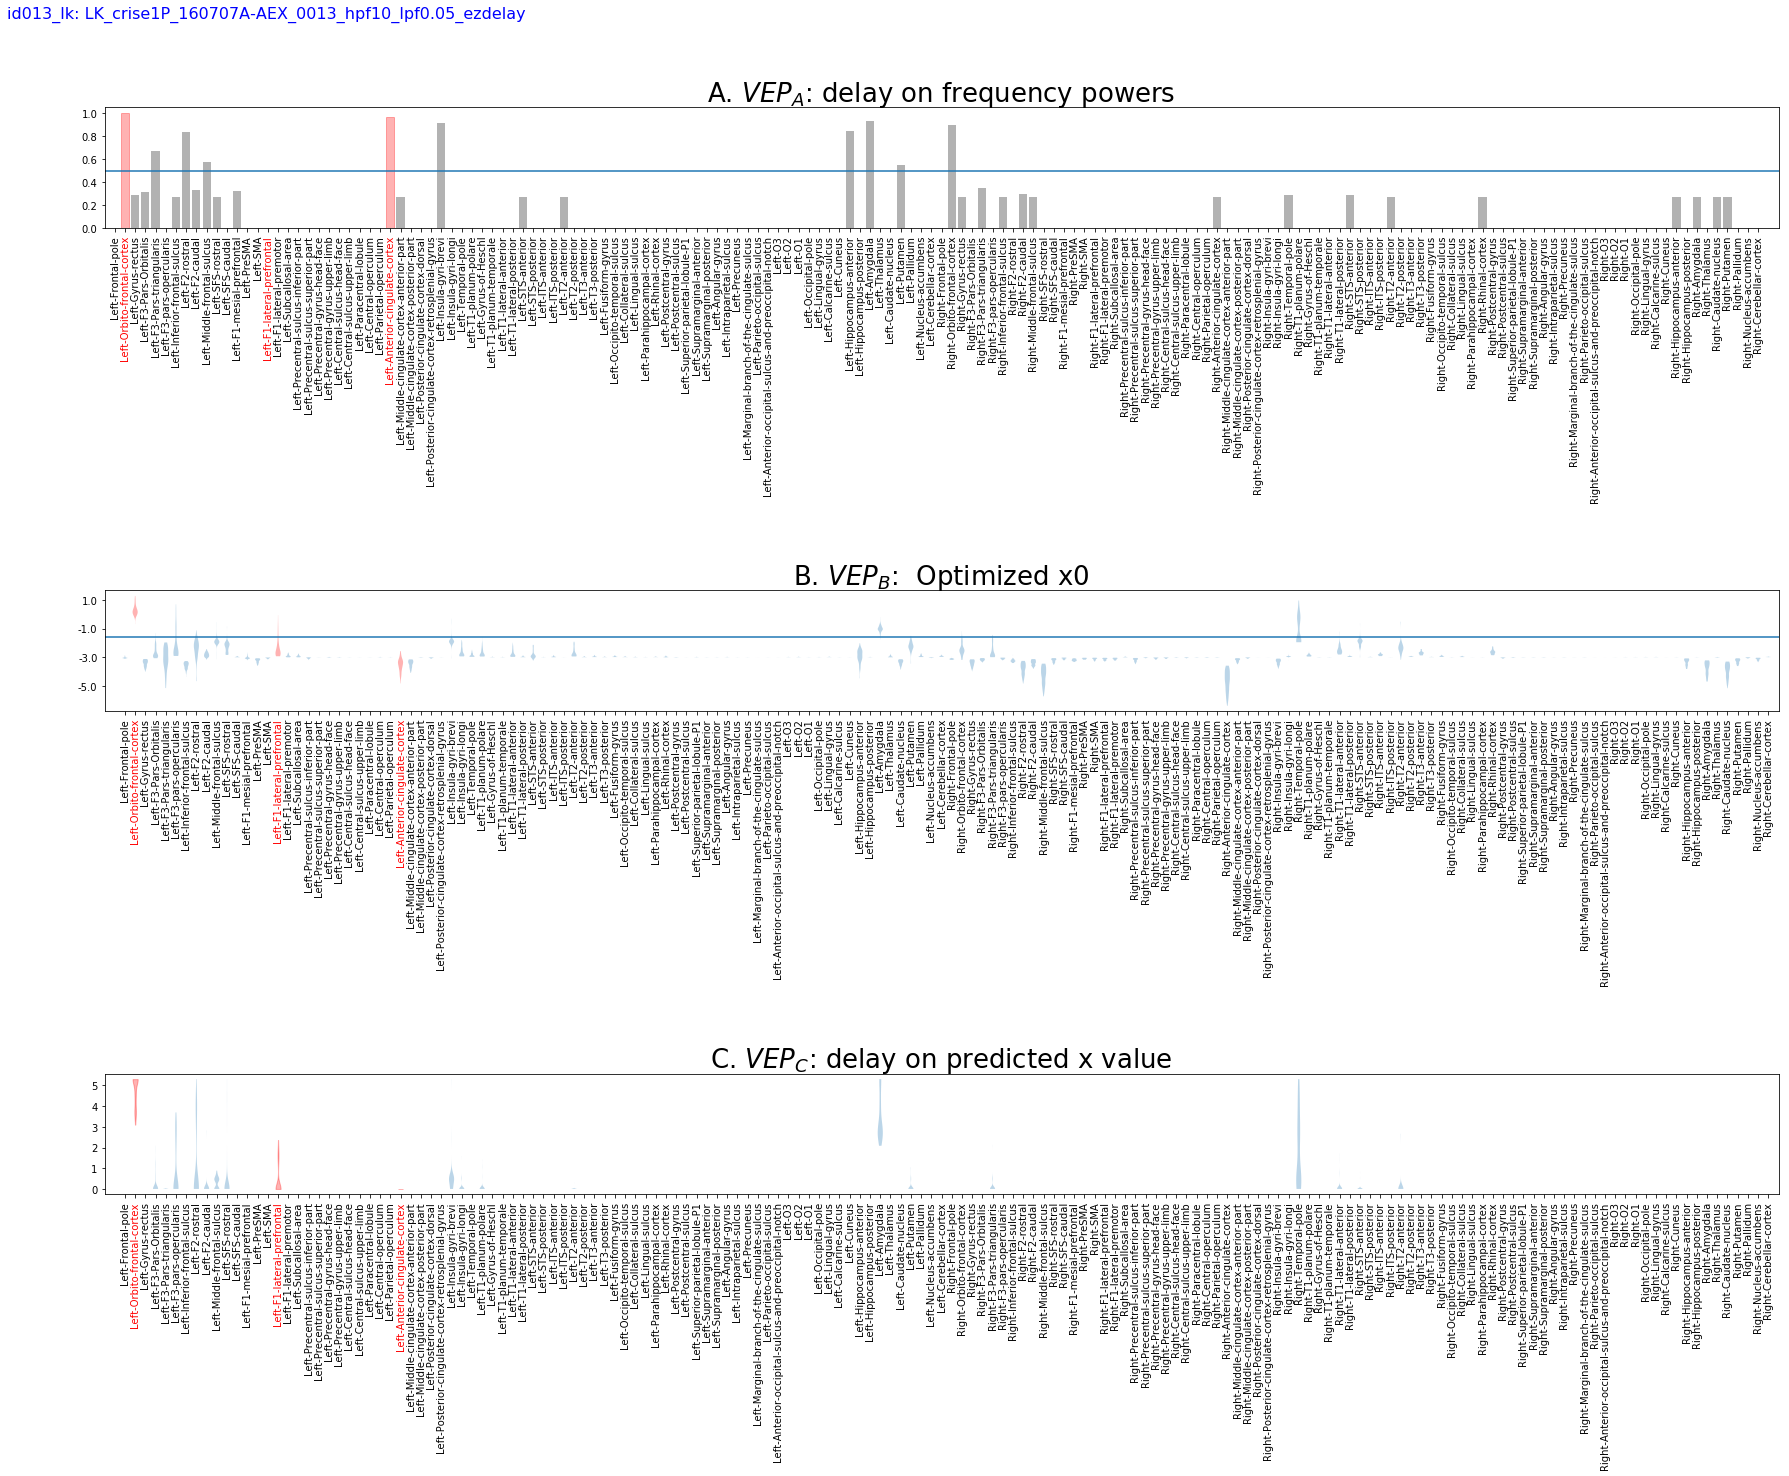

In [94]:
#lib.plots.stan.x0_violin_patient(pstr_samples['x0'], ez_hyp, figsize=(30,5), figname=f'{results_dir}/figures/x0_violin_{fname_suffix}_chain{chain_no}.png')
import matplotlib.gridspec as gridspec
figsize = [30,20]
x0_infer = optima['x0']
ns = x0_infer.shape[1]
plt.figure(figsize=figsize)
gs = gridspec.GridSpec(3,1,hspace = 3)
#ax = plt.subplot(3,1,2)


#plt.figure(figsize=figsize)
#gs = gridspec.GridSpec(1,2,width_ratios = [1,8])

#ax = plt.subplot(3,1,1)
ax=plt.subplot(gs[0,0])
barlist=plt.bar(np.arange(0, ns), d0_prior, color='black', alpha=0.3)
plt.xticks(np.r_[:len(roi)], roi, rotation = 90);

for ichanvep in ezh_all[patient_id]['i_ez']:
    plt.gca().get_xticklabels()[ichanvep].set_color('red')
    barlist[ichanvep].set_color('r')
for ichanvep in ezh_all[patient_id]['i_pz']:
    plt.gca().get_xticklabels()[ichanvep].set_color('blue')
    barlist[ichanvep].set_color('blue')
plt.title('A. $VEP_A$: delay on frequency powers', fontsize = 26);
ax.axhline(0.5)
plt.xlim([-1,163])

ax=plt.subplot(gs[1,0])
parts =plt.violinplot(VEP_B_BT+7,showmeans=False,
        showextrema=False) #plt.bar(np.arange(0, ns), x0_infer[0]+7, color='black', alpha=0.3)


plt.xticks(np.r_[1:len(roi)+1], roi, rotation = 90);
ax.axhline(-1.6+7)
for ichanvep in ezh_all[patient_id]['i_ez']:
    plt.gca().get_xticklabels()[ichanvep].set_color('red')
    #barlist[ichanvep].set_color('r')
    pc=parts['bodies'][ichanvep]
    pc.set_facecolor('red')
for ichanvep in ezh_all[patient_id]['i_pz']:
    plt.gca().get_xticklabels()[ichanvep].set_color('blue')
    parts['bodies'][ichanvep].set_facecolor('blue')
plt.title('B. $VEP_B$:  Optimized x0', fontsize = 26)       
plt.xlim([-1,163])
ax.set_yticklabels(item-7. for item in ax.get_yticks())


ax=plt.subplot(gs[2,0])
#ax = plt.subplot(3,1,3)
#plt.figure(figsize=figsize)
parts=plt.violinplot(VEP_C_BT,showmeans=False, showmedians=False,
        showextrema=False)
#barlist=plt.bar(np.arange(0, ns), ez_pred, color='black', alpha=0.3)
plt.xticks(np.r_[1:len(roi)+1], roi, rotation = 90);

for ichanvep in ezh_all[patient_id]['i_ez']:
    plt.gca().get_xticklabels()[ichanvep].set_color('red')
    pc=parts['bodies'][ichanvep]
    pc.set_facecolor('red')
    parts['bodies'][ichanvep].set_edgecolor('red')
for ichanvep in ezh_all[patient_id]['i_pz']:
    plt.gca().get_xticklabels()[ichanvep].set_color('blue')
    parts['bodies'][ichanvep].set_facecolor('blue')
plt.title('C. $VEP_C$: delay on predicted x value', fontsize = 26);
plt.xlim([-1,163])
figname=f'{results_dir}/figuresBT/BTVep3value_{fname_suffix}.png'
plt.suptitle(f'{patient_id}: {fname_suffix}',x=0.2, y=.95, fontsize = 16, color='blue')
plt.savefig(figname)

Sel_Region = np.r_[0:81]
import matplotlib.gridspec as gridspec
figsize = [30,20]
x0_infer = pstr_samples['x0'][0,Sel_Region]

plt.figure(figsize=figsize)
gs = gridspec.GridSpec(3,1,hspace = 3)
#ax = plt.subplot(3,1,2)

iroi=[roi[indroi] for indroi in Sel_Region]
ns = len(iroi)
#plt.figure(figsize=figsize)
#gs = gridspec.GridSpec(1,2,width_ratios = [1,8])

#ax = plt.subplot(3,1,1)
ax=plt.subplot(gs[0,0])
barlist=plt.bar(np.arange(0, ns), d0_prior[Sel_Region], color='black', alpha=0.3)
plt.xticks(np.r_[:len(iroi)], iroi, rotation = 90);


for ichanvep in ezh_all[patient_id]['i_ez']:
    plt.gca().get_xticklabels()[ichanvep].set_color('red')
    barlist[ichanvep].set_color('r')
for ichanvep in ezh_all[patient_id]['i_pz']:
    plt.gca().get_xticklabels()[ichanvep].set_color('blue')
    barlist[ichanvep].set_color('blue')

plt.title('A. $VEP_A$: delay on frequency powers', fontsize = 26);
ax.axhline(0.5)
plt.xlim([-1,ns+1])

ax=plt.subplot(gs[1,0])
parts =plt.violinplot(VEP_B_BT[:,Sel_Region]+7,showmeans=False,
        showextrema=False) #plt.bar(np.arange(0, ns), x0_infer[0]+7, color='black', alpha=0.3)


plt.xticks(np.r_[1:len(iroi)+1], iroi, rotation = 90);
ax.axhline(-1.6+7)

for ichanvep in ezh_all[patient_id]['i_ez']:
    plt.gca().get_xticklabels()[ichanvep].set_color('red')
    #barlist[ichanvep].set_color('r')
    pc=parts['bodies'][ichanvep]
    pc.set_facecolor('red')
for ichanvep in ezh_all[patient_id]['i_pz']:
    plt.gca().get_xticklabels()[ichanvep].set_color('blue')
    parts['bodies'][ichanvep].set_facecolor('blue')

plt.title('B. $VEP_B$:  Optimized x0', fontsize = 26)       
plt.xlim([-1,ns+1])
ax.set_yticklabels(item-7. for item in ax.get_yticks())


ax=plt.subplot(gs[2,0])
#ax = plt.subplot(3,1,3)
#plt.figure(figsize=figsize)
parts=plt.violinplot(VEP_C_BT[:,Sel_Region],showmeans=False, showmedians=False,
        showextrema=False)
#barlist=plt.bar(np.arange(0, ns), ez_pred, color='black', alpha=0.3)
plt.xticks(np.r_[1:len(iroi)+1], iroi, rotation = 90);

for ichanvep in ezh_all[patient_id]['i_ez']:
    plt.gca().get_xticklabels()[ichanvep].set_color('red')
    pc=parts['bodies'][ichanvep]
    pc.set_facecolor('red')
    parts['bodies'][ichanvep].set_edgecolor('red')
for ichanvep in ezh_all[patient_id]['i_pz']:
    plt.gca().get_xticklabels()[ichanvep].set_color('blue')
    parts['bodies'][ichanvep].set_facecolor('blue')

plt.title('C. $VEP_C$: delay on predicted x value', fontsize = 26);
plt.xlim([-1,ns+1])
figname=f'{results_dir}/figuresBT/BTVep3value_{fname_suffix}_SCH.png'
plt.suptitle(f'{patient_id}: {fname_suffix}',x=0.2, y=.95, fontsize = 16, color='blue')
plt.savefig(figname)

In [95]:
x0_50_norm = np.percentile(VEP_C_BT, 50, axis=0)

i_x0_50_norm = np.argsort(-x0_50_norm)

ind_first_15_region=i_x0_50_norm[:15]
first_15_region=[roi[indsort] for indsort in ind_first_15_region]

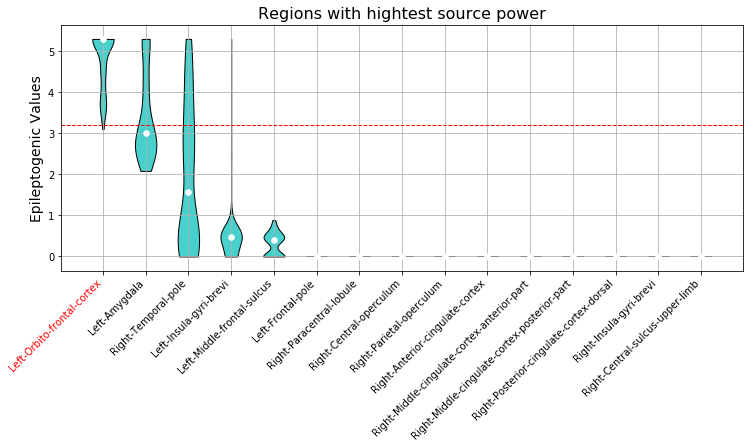

In [97]:
plt.figure(figsize=[10,4])

parts = plt.violinplot(VEP_C_BT[:, i_x0_50_norm][:,:15],showmeans=False, showmedians=False,
        showextrema=False)
medians = x0_50_norm[i_x0_50_norm[:15]]

for pc,ix0mean in zip(parts['bodies'],medians):
    if ix0mean>0:
        ifacecolor='mediumturquoise'
    else:
        ifacecolor='mediumturquoise'#'mediumseagreen'
    pc.set_facecolor(ifacecolor)
    pc.set_edgecolor('black')
    pc.set_alpha(1)
plt.axhline(3.2, color='r',linestyle = '--',lw=1)

inds = np.arange(1, len(medians) + 1)
plt.scatter(inds, medians, marker='o', color='white', s=30, zorder=3)
plt.tight_layout()
plt.grid(1)
plt.title('Regions with hightest source power',fontsize=16);
plt.ylabel('Epileptogenic Values', fontsize=14);
plt.xticks(np.r_[1:16], first_15_region, rotation=45,horizontalalignment='right');
for indch, ichan in enumerate(ind_first_15_region):
    if ichan in  ezh_all[patient_id]['i_ez']:
        plt.gca().get_xticklabels()[indch].set_color('red')
        barlist[ichanvep].set_color('r')
    if ichan in ezh_all[patient_id]['i_pz']:
        plt.gca().get_xticklabels()[indch].set_color('blue')
        barlist[ichanvep].set_color('blue')


#figure_Violin_Name=f'{sd}/vep/{datasets}_ViolinPlot.png';
#savefig(figure_Violin_Name,bbox_inches="tight",dpi=300)
figname=f'{results_dir}/figuresBT/BT_EpileptogenicValue_{fname_suffix}.png'
plt.savefig(figname,bbox_inches="tight",dpi=300)

In [98]:
first_15_region

['Left-Orbito-frontal-cortex',
 'Left-Amygdala',
 'Right-Temporal-pole',
 'Left-Insula-gyri-brevi',
 'Left-Middle-frontal-sulcus',
 'Left-Frontal-pole',
 'Right-Paracentral-lobule',
 'Right-Central-operculum',
 'Right-Parietal-operculum',
 'Right-Anterior-cingulate-cortex',
 'Right-Middle-cingulate-cortex-anterior-part',
 'Right-Middle-cingulate-cortex-posterior-part',
 'Right-Posterior-cingulate-cortex-dorsal',
 'Right-Insula-gyri-brevi',
 'Right-Central-sulcus-upper-limb']

In [103]:
data_dir=f'/home/hfw/Retro/datasets/{patient_id}'
raw_seeg_fname = f'{szr_name}.raw.fif'
#data_mono = retro_prepare_data.prepare_data(data_dir, meta_data_fname, raw_seeg_fname, szr_name, hpf, lpf)
#raw_seeg_fname = f'{szr_name}.bip.raw.fif'
data = retro_prepare.prepare_data_bip(data_dir, meta_data_fname, raw_seeg_fname, szr_name, hpf, lpf)
seeg, bip = retro_prepare.read_one_seeg(data_dir, meta_data_fname, raw_seeg_fname)

Isotrak not found
Isotrak not found


In [104]:
#roi_sel=['Left-T1-lateral-anterior','Left-STS-anterior']:17
#roi_sel=['Left-Gyrus-of-Heschl']: 10
#roi_sel = ['Right-Collateral-sulcus', 'Left-Hippocampus-anterior', 'Right-Parahippocampal-cortex','Left-Occipito-temporal-sulcus']:4
#roi_sel = ['Right-Collateral-sulcus']:20  
#roi_sel =  []:25
#roi_sel = [ 'Left-Intraparietal-sulcus','Right-Inferior-frontal-sulcus']:50
#roi_sel=['Left-Postcentral-sulcus']:22    
#roi_sel=['Left-Anterior-cingulate-cortex'];27
#roi_sel=['Right-T1-lateral-anterior', 'Right-Central-sulcus-head-face', 'Right-STS-posterior','Right-Collateral-sulcus','Right-Hippocampus-anterior'];30
#roi_sel =  [];39
roi_sel =['Left-Amygdala']
ind_Fp_elec = []
for idroi, iroi in enumerate(roi_sel):

    for ibip_elec, indroi_iv in zip(bip.ch_names,np.argmax(data['gain'],axis=1)):
        if roi[indroi_iv]== iroi:
            print(ibip_elec, ': ', roi[indroi_iv])
            ind_Fp_elec.append(bip.ch_names.index(ibip_elec))



A'1-2 :  Left-Amygdala
A'3-4 :  Left-Amygdala
A'4-5 :  Left-Amygdala
A'5-6 :  Left-Amygdala
A'6-7 :  Left-Amygdala
A'7-8 :  Left-Amygdala
B'1-2 :  Left-Amygdala
B'2-3 :  Left-Amygdala


OR'1-2 :  Left-Orbito-frontal-cortex
OR'2-3 :  Left-Orbito-frontal-cortex
OR'3-4 :  Left-Orbito-frontal-cortex
OR'4-5 :  Left-Orbito-frontal-cortex
OR'5-6 :  Left-Orbito-frontal-cortex
R'2-3 :  Left-Orbito-frontal-cortex
R'4-5 :  Left-Orbito-frontal-cortex
R'5-6 :  Left-Orbito-frontal-cortex
R'6-7 :  Left-Orbito-frontal-cortex
R'7-8 :  Left-Orbito-frontal-cortex
R'8-9 :  Left-Orbito-frontal-cortex
R'10-11 :  Left-Orbito-frontal-cortex
R'11-12 :  Left-Orbito-frontal-cortex
R'12-13 :  Left-Orbito-frontal-cortex
CR'1-2 :  Left-Anterior-cingulate-cortex
CR'2-3 :  Left-Anterior-cingulate-cortex
CR'3-4 :  Left-Anterior-cingulate-cortex
CR'4-5 :  Left-Anterior-cingulate-cortex
CR'5-6 :  Left-Anterior-cingulate-cortex
OF'1-2 :  Left-Anterior-cingulate-cortex
OF'2-3 :  Left-Anterior-cingulate-cortex
CR1-2 :  Left-Anterior-cingulate-cortex
CR2-3 :  Left-Anterior-cingulate-cortex


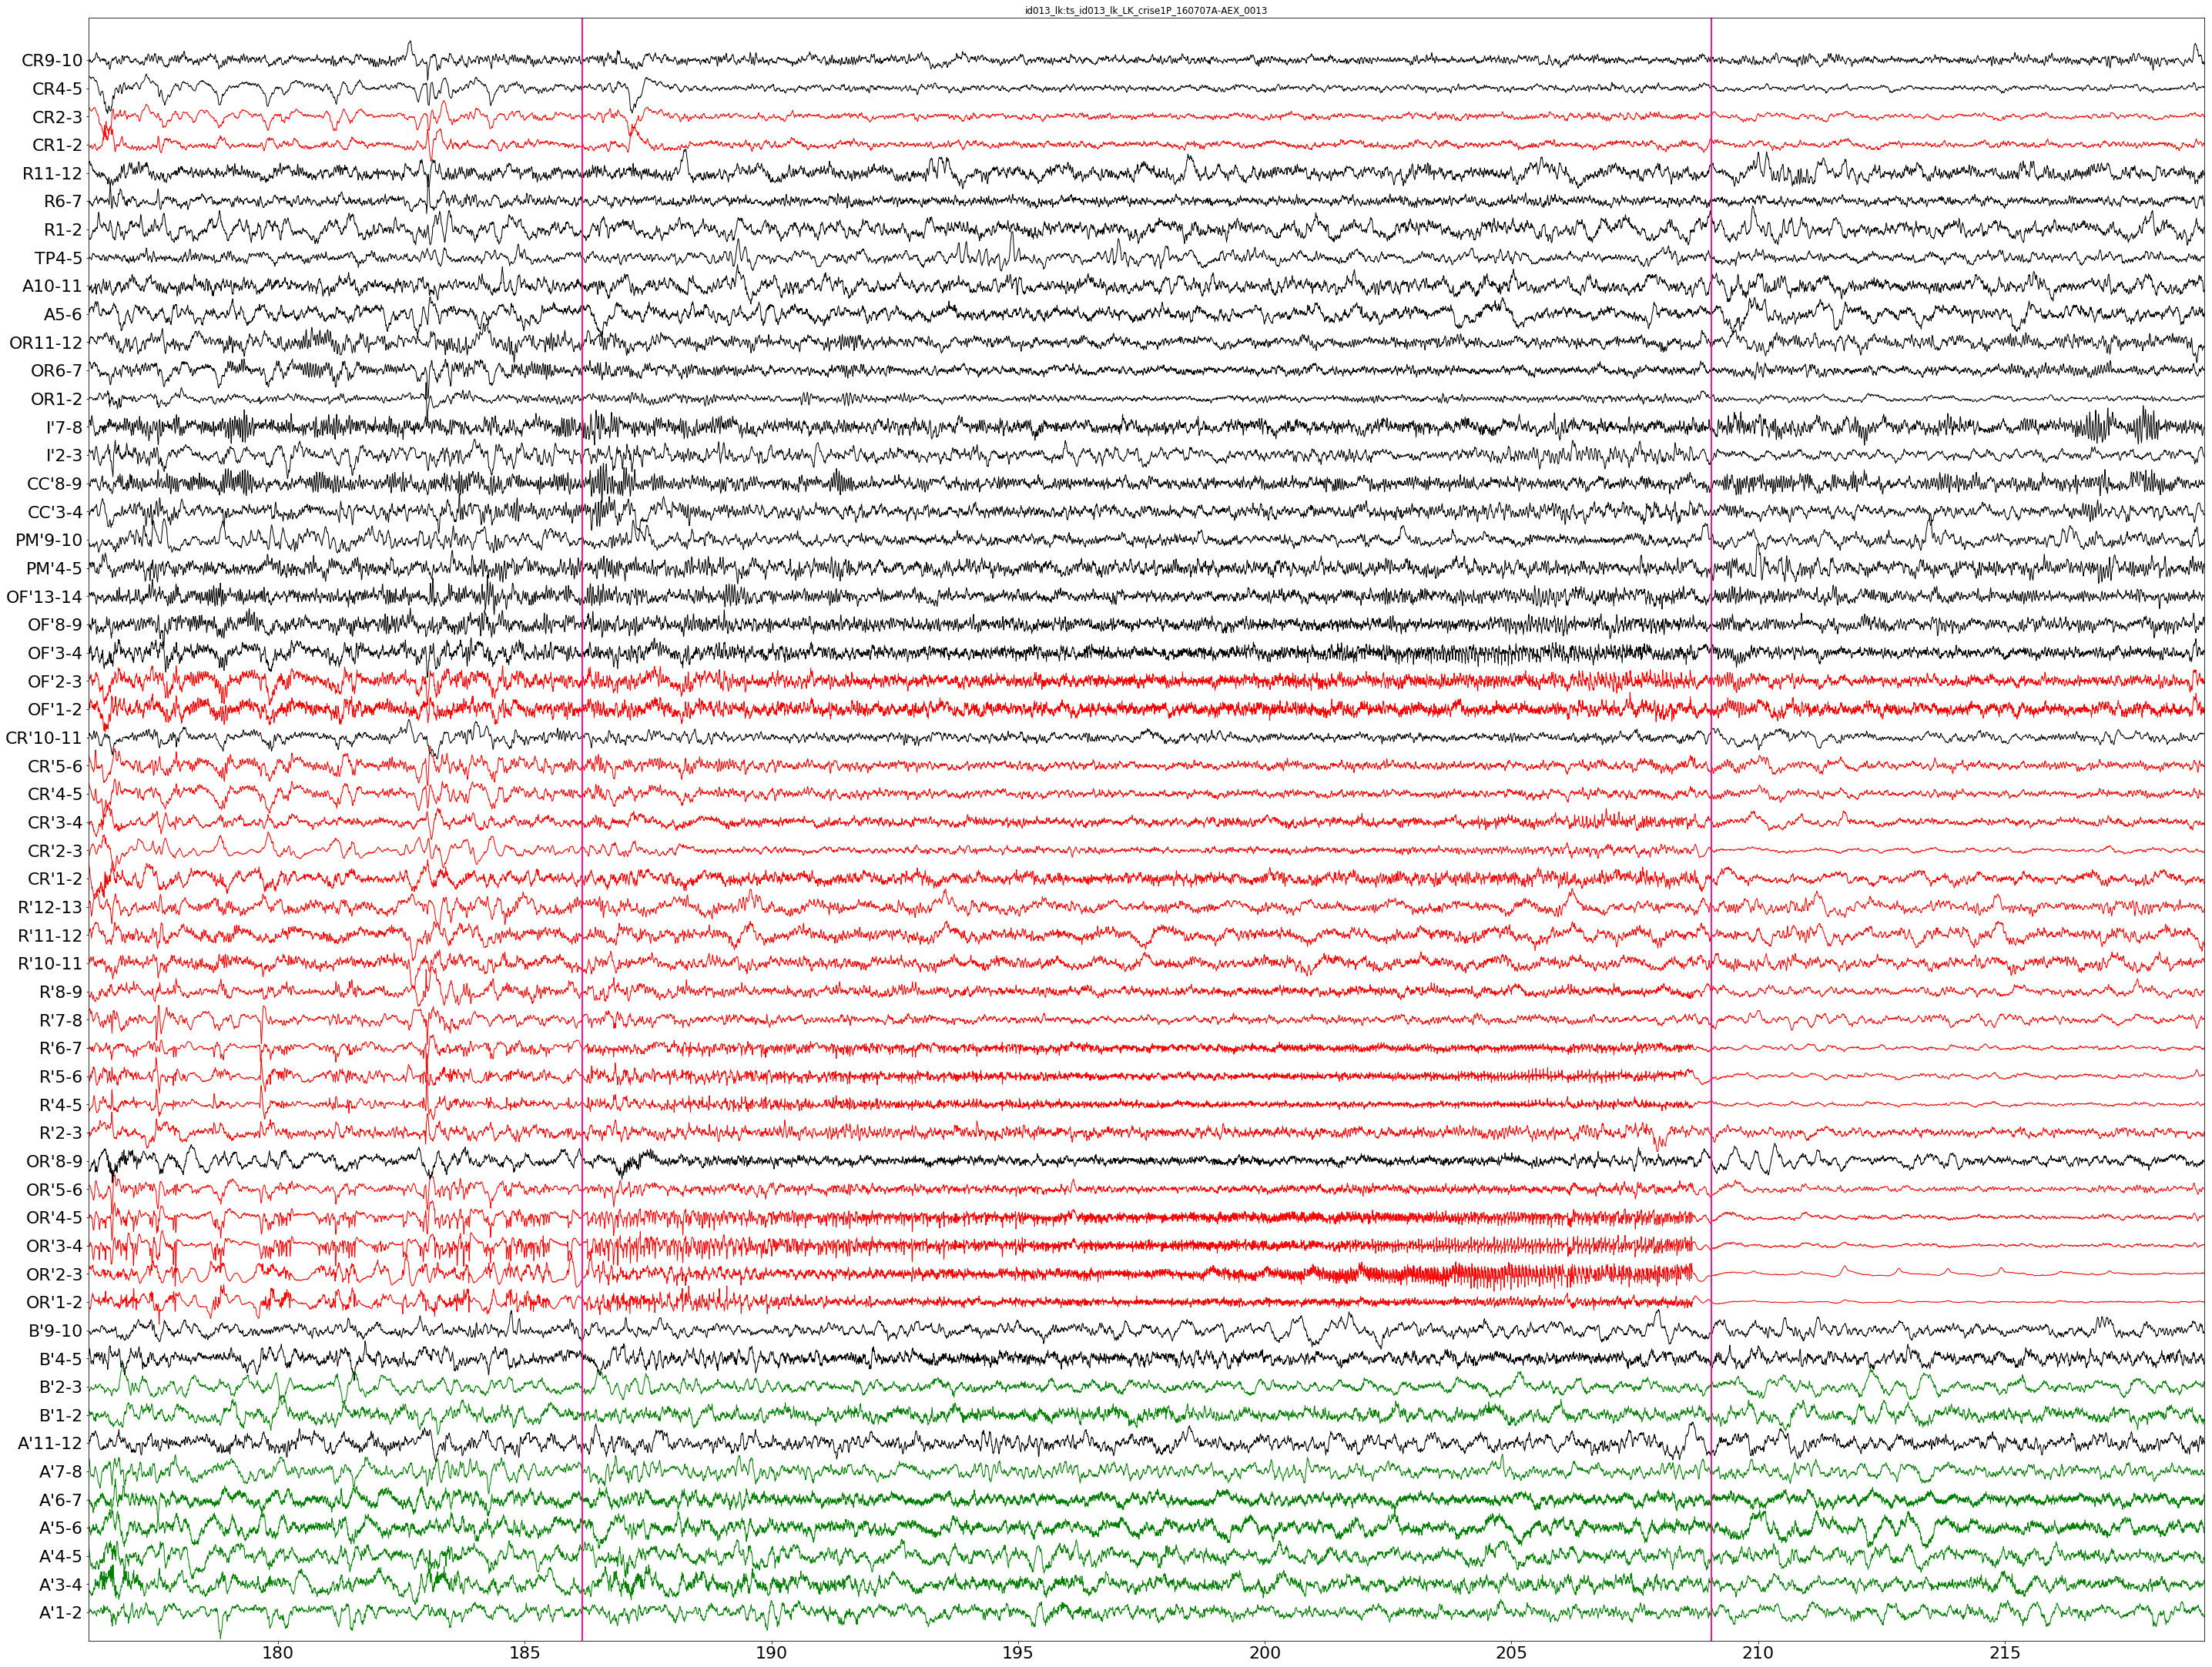

In [105]:
ind_ez_elec = []
for idroi, iroi in enumerate(ezh_all[patient_id]['i_ez']):
    for ibip_elec, indroi_iv in zip(bip.ch_names,np.argmax(data['gain'],axis=1)):
        if iroi == indroi_iv:
            print(ibip_elec, ': ', roi[indroi_iv])
            ind_ez_elec.append(bip.ch_names.index(ibip_elec))
ind_pz_elec = []
for idroi, iroi in enumerate(ezh_all[patient_id]['i_pz']):
    for ibip_elec, indroi_iv in zip(bip.ch_names,np.argmax(data['gain'],axis=1)):
        if iroi == indroi_iv:
            print(ibip_elec, ': ', roi[indroi_iv])
            ind_pz_elec.append(bip.ch_names.index(ibip_elec))

indepz=ind_ez_elec + ind_pz_elec + ind_Fp_elec

ind_nch=np.arange(0,len(bip.ch_names),5)

nch = indepz + list(set(ind_nch) - set(indepz))

nch.sort()

ts = 10
base_length = int(seeg['sfreq']*ts)

start_idx = int(seeg['onset'] * seeg['sfreq']) - base_length
end_idx = int(seeg['offset'] * seeg['sfreq']) + base_length
y = bip.get_data().T[start_idx:end_idx].T
t = bip.times[start_idx:end_idx]

plt.figure(figsize=[40,30])
scaleplt=1.4
Ty=np.arange(np.shape(y[0])[0])
show_ch=[]
for ind, ich in enumerate(nch):
    if ich in ind_ez_elec:
        plt.plot(t, scaleplt*y[ich]/np.ptp(y[ich]) + ind, 'red', lw=1);
    elif ich in ind_pz_elec:
        plt.plot(t, scaleplt*y[ich]/np.ptp(y[ich]) + ind, 'blue', lw=1);
    elif ich in ind_Fp_elec:
        plt.plot(t, scaleplt*y[ich]/np.ptp(y[ich]) + ind, 'green', lw=1);
    else: 
        plt.plot(t, scaleplt*y[ich]/np.ptp(y[ich]) + ind, 'black', lw=1);
    
    show_ch.append(bip.ch_names[ich])
plt.yticks(np.arange(len(show_ch)),show_ch, fontsize=22);


plt.xticks(fontsize=22)
plt.ylim([-1,len(nch)+0.5])
plt.xlim([t[0],t[-1]])
plt.axvline(seeg['onset'], color='DeepPink', lw=2)
plt.axvline(seeg['offset'],color='DeepPink', lw=2)
plt.tight_layout()
plt.title(f'{patient_id}:ts_{patient_id}_{szr_name}')
plt.savefig(f'{results_dir}/figuresBT/ts_{patient_id}_{szr_name}_bf.png')

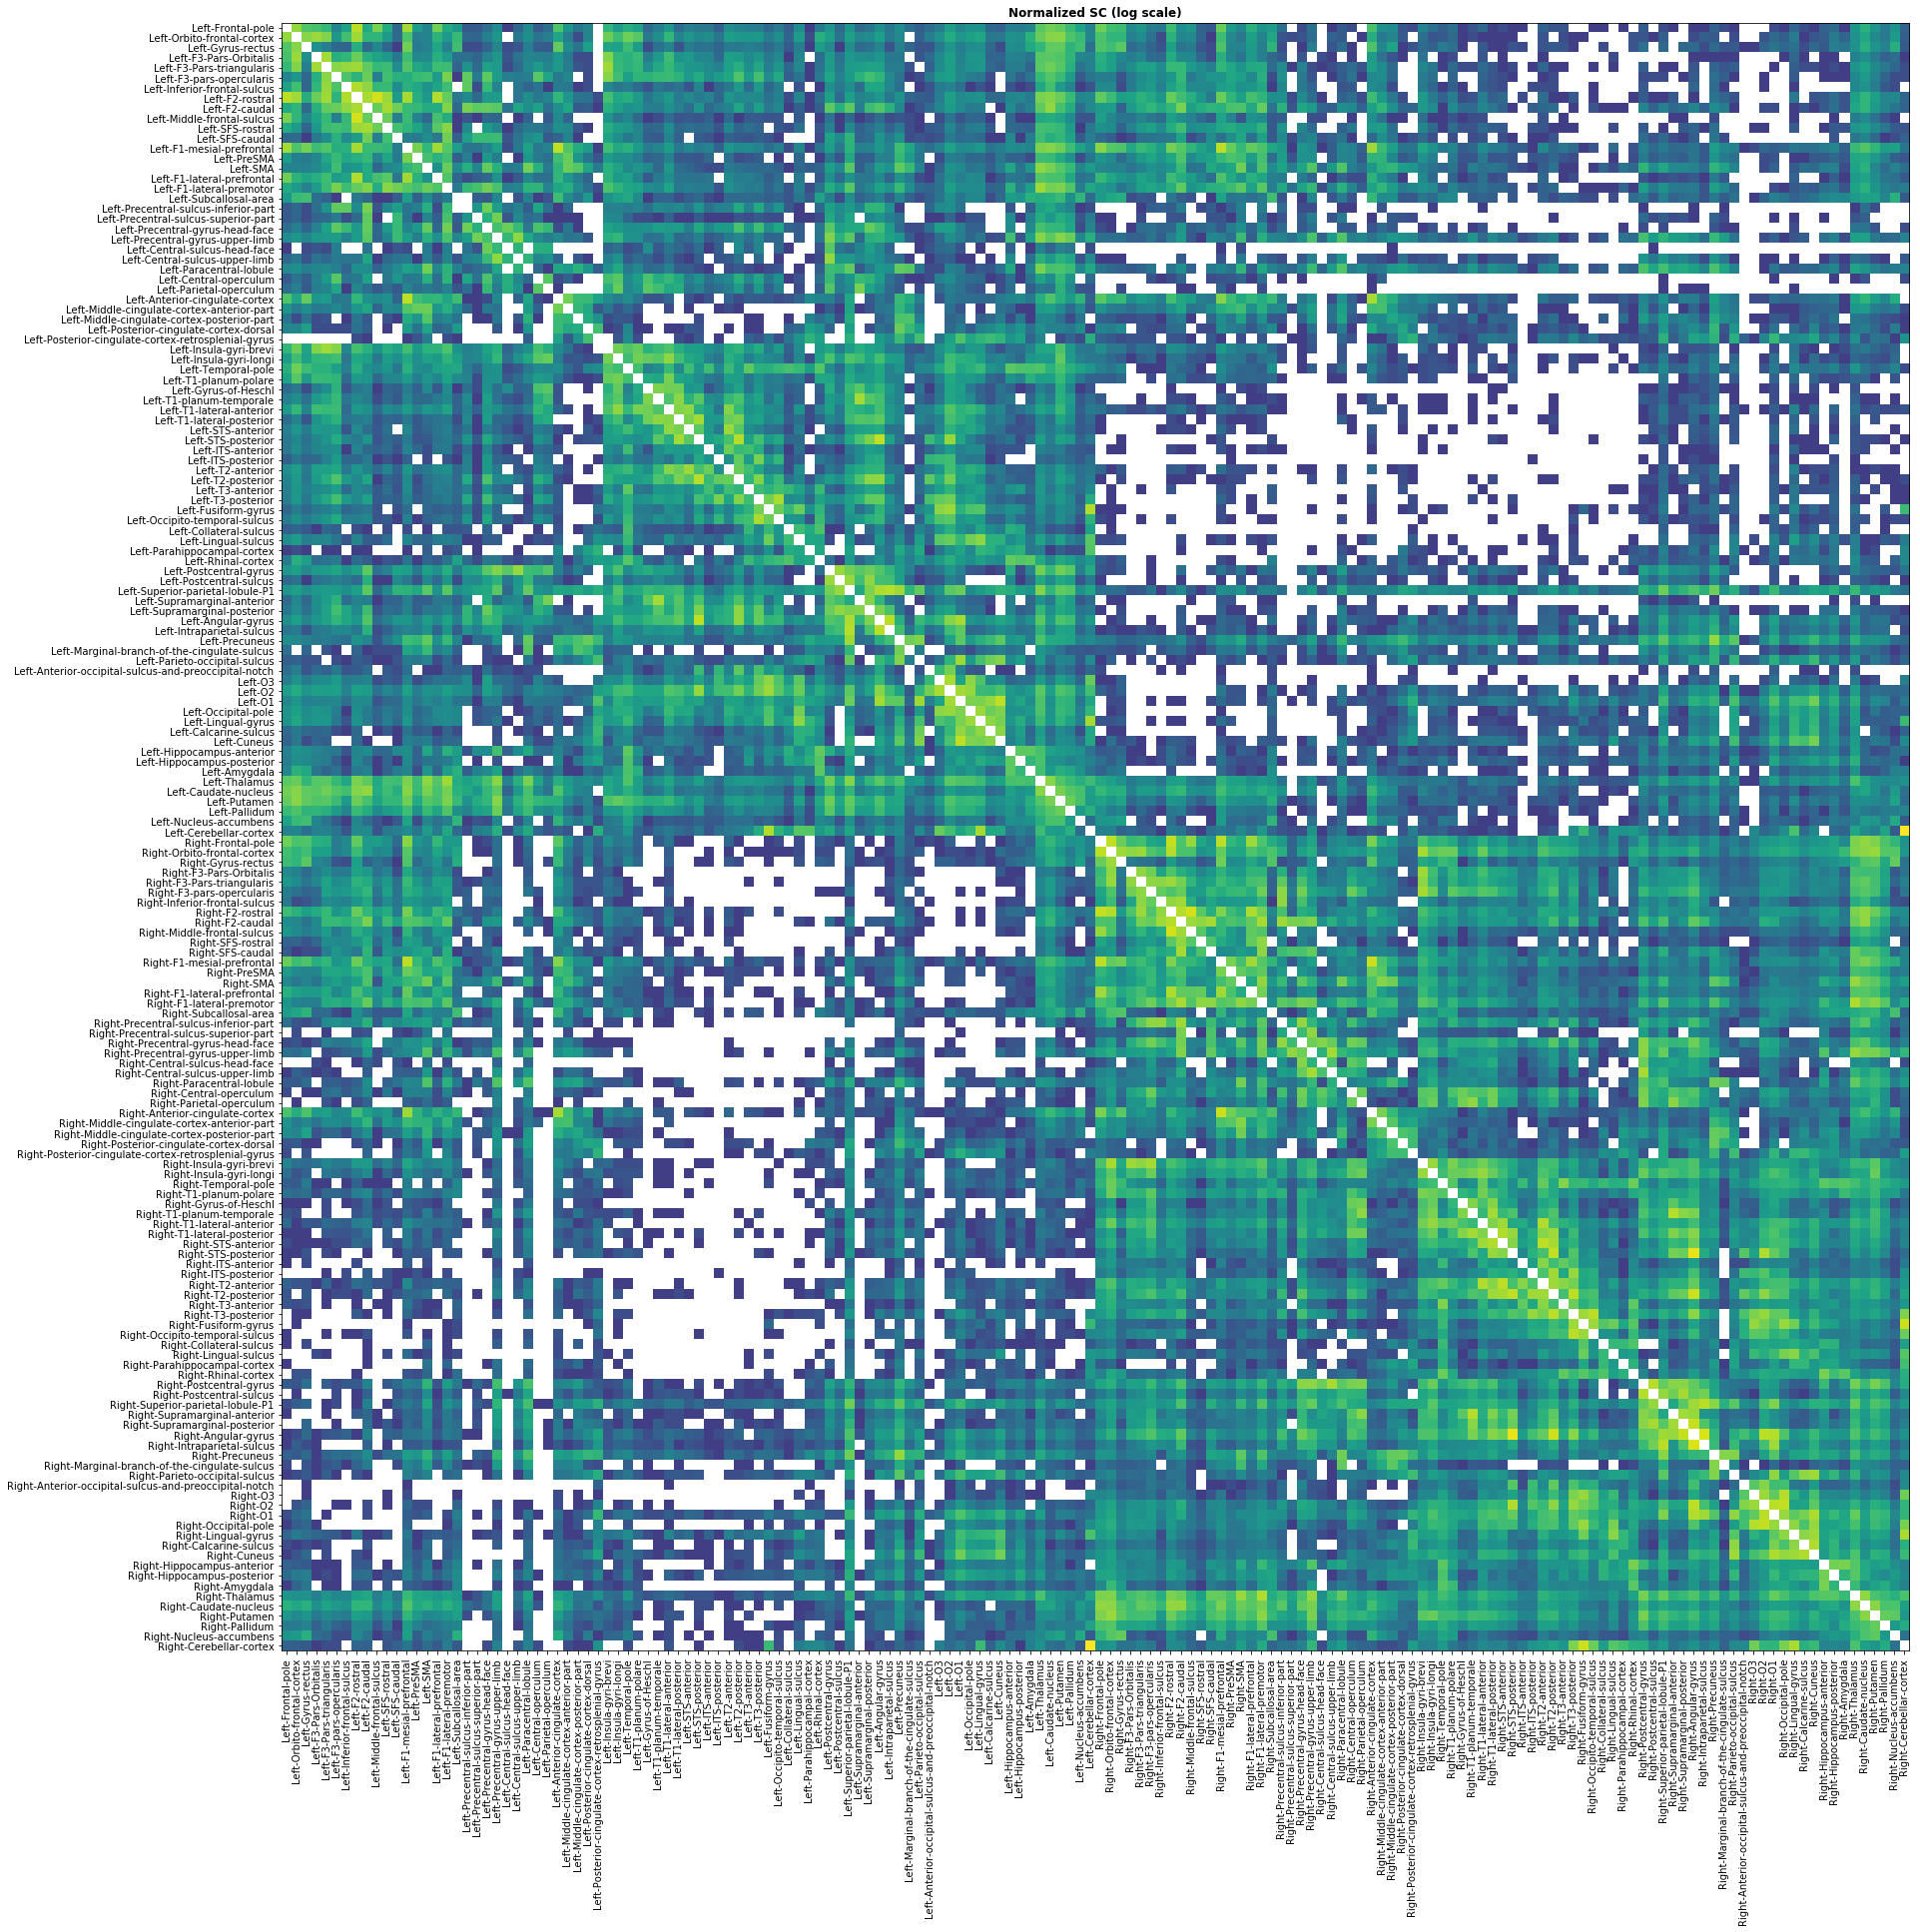

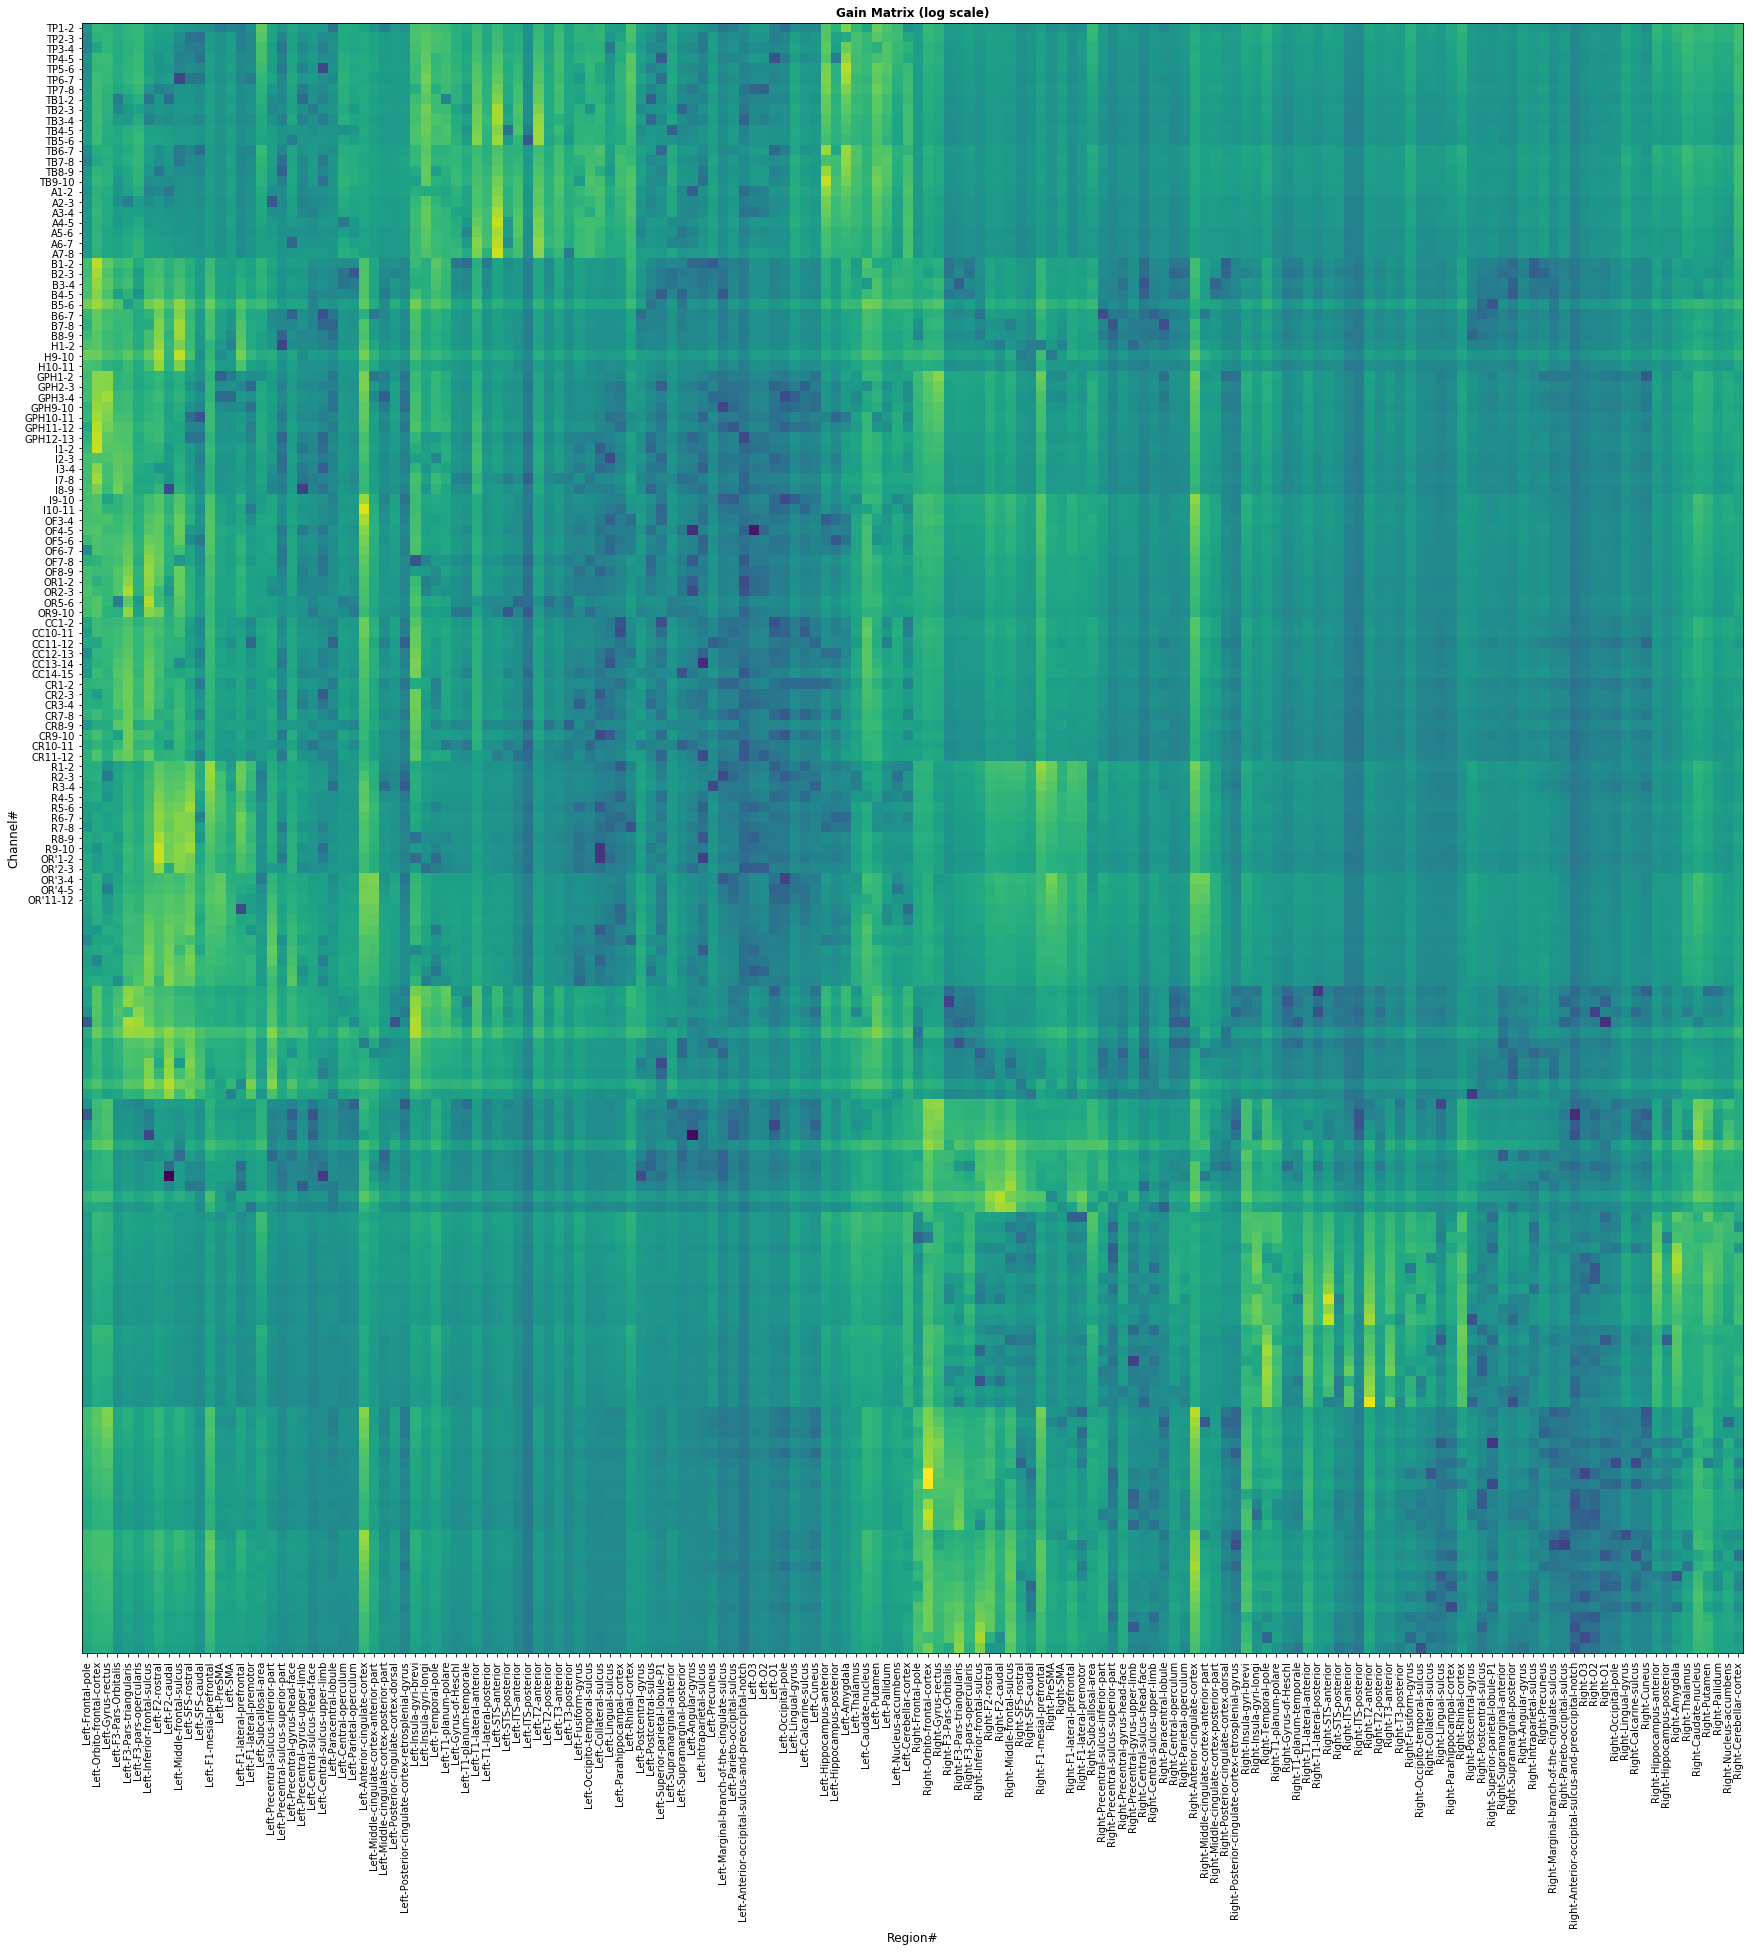

In [102]:
plt.figure(figsize=(30,30))
#plt.subplot(121)
plt.imshow(data['SC'],norm=matplotlib.colors.LogNorm(vmin=1e-6, vmax=data['SC'].max()));
#plt.colorbar(fraction=0.046,pad=0.04);
plt.xticks(np.r_[:len(roi)], roi, rotation = 90);
plt.yticks(np.r_[:len(roi)], roi);
plt.title('Normalized SC (log scale)',fontsize=12, fontweight='bold');
plt.savefig(f'{results_dir}/figuresBT/{patient_id}_SC.png')

plt.figure(figsize=(30,30))
#plt.subplot(122)
plt.imshow(data['gain'],norm=matplotlib.colors.LogNorm(vmin=data['gain'].min(), vmax=data['gain'].max()));
#plt.colorbar(fraction=0.046,pad=0.04);
plt.xticks(np.r_[:len(roi)], roi, rotation = 90);
plt.yticks(np.r_[:len(bip.ch_names)], bip.ch_names);
plt.xlabel('Region#', fontsize=12);
plt.ylabel('Channel#', fontsize=12);
plt.title('Gain Matrix (log scale)',fontsize=12, fontweight='bold');
plt.savefig(f'{results_dir}/figuresBT/{patient_id}_gainMatrix.png')



In [111]:
roi_sel=['Left-Amygdala','Left-Hippocampus-anterior','Left-Hippocampus-posterior']
color = ['red','orange','green','blue']
add='False Negative'
#roi_sel = ['Left-Hippocampus-posterior', 'Left-Hippocampus-anterior']
plt.figure(figsize=(20,5))
ns=162
vep_smax = np.zeros(ns)

legend_elements = []
for il, ilabel in enumerate(roi_sel):
    legend_elements.append(Line2D([0], [0], color=color[il], linewidth=4, label=ilabel))

plt.plot(slp, color='black', alpha=0.3);



for idroi, iroi in enumerate(roi_sel):
    ez_contacts_ = []

    for ibip_elec, indroi_iv in zip(bip.ch_names,np.argmax(data['gain'],axis=1)):
        if roi[indroi_iv]== iroi:
            print(ibip_elec, ': ', roi[indroi_iv])
            ez_contacts_.append(ibip_elec)
    m_ez = np.array([_ in ez_contacts_ for _ in bip.ch_names])
    
    plt.plot(slp[:,m_ez],color=legend_elements[idroi].get_color(),alpha = 1);
       

plt.legend(handles=legend_elements)
plt.title('Data feature curves on sensor level')
figname=f'{results_dir}/figures/fdfc_A_{fname_suffix}_{add}.png'
plt.savefig(figname)
#plt.xticks(np.r_[:len(roi)], roi, rotation = 90);
#plt.axvline(base_length)
#plt.axvline(len(slp)-base_length)

NameError: name 'slp' is not defined

<Figure size 1440x360 with 0 Axes>

In [ ]:
#roi_sel = ['Left-Hippocampus-posterior', 'Left-Hippocampus-anterior']
#roi_sel=['Left-SFS-caudal']
#add='left-SFS-caudal'
plt.figure(figsize=(24,4))

power=(data['slp']**2).mean(axis=0)
barlist=plt.bar(np.arange(0, len(power)), power, color='black', alpha=0.3)
plt.xticks(np.r_[:len(bip.ch_names)], bip.ch_names, rotation = 90);

for idroi, iroi in enumerate(roi_sel):
    ez_contacts_ = []

    for ibip_elec, indroi_iv in zip(bip.ch_names,np.argmax(data['gain'],axis=1)):
        if roi[indroi_iv]== iroi:
            print(ibip_elec, ': ', roi[indroi_iv])
            ez_contacts_.append(ibip_elec)
    m_ez = np.array([_ in ez_contacts_ for _ in bip.ch_names])
    
    
    for ichanvep in np.where(m_ez == True)[0]:
        barlist[ichanvep].set_color(legend_elements[idroi].get_color())
#plt.plot(slp[:,m_ez],color=legend_elements[idroi].get_color(),alpha = 1);
plt.title('SEEG Power')
plt.legend(handles=legend_elements)  
plt.xlim([0,len(bip.ch_names)])
figname=f'{results_dir}/figures/fdfc_C_{fname_suffix}_{add}.png'
plt.savefig(figname)
#plt.gca().get_xticklabels()[m_ez].set_color(legend_elements[idroi].get_color())
 

A'5-6 :  Left-Amygdala
A'6-7 :  Left-Amygdala
A'7-8 :  Left-Amygdala
A'8-9 :  Left-Amygdala
TB'1-2 :  Left-Hippocampus-anterior
TB'2-3 :  Left-Hippocampus-anterior
TB'3-4 :  Left-Hippocampus-anterior
A'1-2 :  Left-Hippocampus-anterior
A'2-3 :  Left-Hippocampus-anterior
A'3-4 :  Left-Hippocampus-anterior
A'4-5 :  Left-Hippocampus-anterior
B'1-2 :  Left-Hippocampus-anterior
B'2-3 :  Left-Hippocampus-anterior
B'3-4 :  Left-Hippocampus-anterior
B'4-5 :  Left-Hippocampus-anterior
B'5-6 :  Left-Hippocampus-anterior
GPH'3-4 :  Left-Hippocampus-posterior
GPH'4-5 :  Left-Hippocampus-posterior
GPH'5-6 :  Left-Hippocampus-posterior


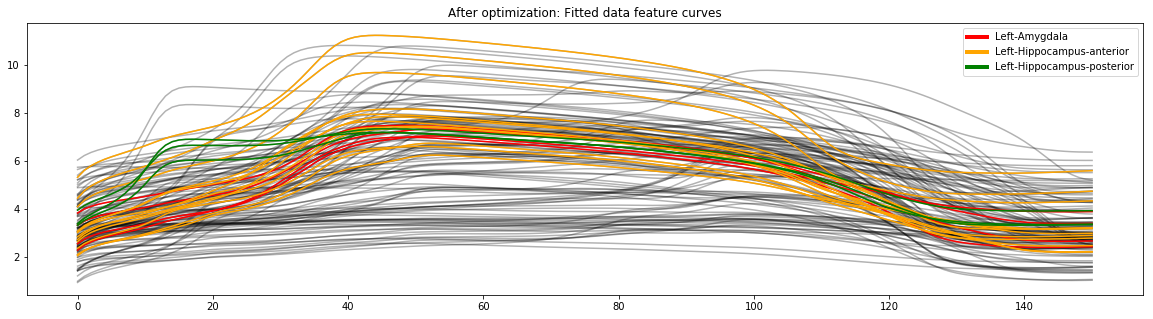

In [20]:
plt.figure(figsize=(20,5))
ns=162
vep_smax = np.zeros(ns)

mu_slp=pstr_samples['mu_slp'].mean(axis=0)



plt.plot(mu_slp, color='black', alpha=0.3);



for idroi, iroi in enumerate(roi_sel):
    ez_contacts_ = []

    for ibip_elec, indroi_iv in zip(bip.ch_names,np.argmax(data['gain'],axis=1)):
        if roi[indroi_iv]== iroi:
            print(ibip_elec, ': ', roi[indroi_iv])
            ez_contacts_.append(ibip_elec)
    m_ez = np.array([_ in ez_contacts_ for _ in bip.ch_names])
    
    plt.plot(mu_slp[:,m_ez],color=legend_elements[idroi].get_color(),alpha = 1);
       

plt.legend(handles=legend_elements)
plt.title('After optimization: Fitted data feature curves')
figname=f'{results_dir}/figures/fdfc_B_{fname_suffix}_{add}.png'
plt.savefig(figname)

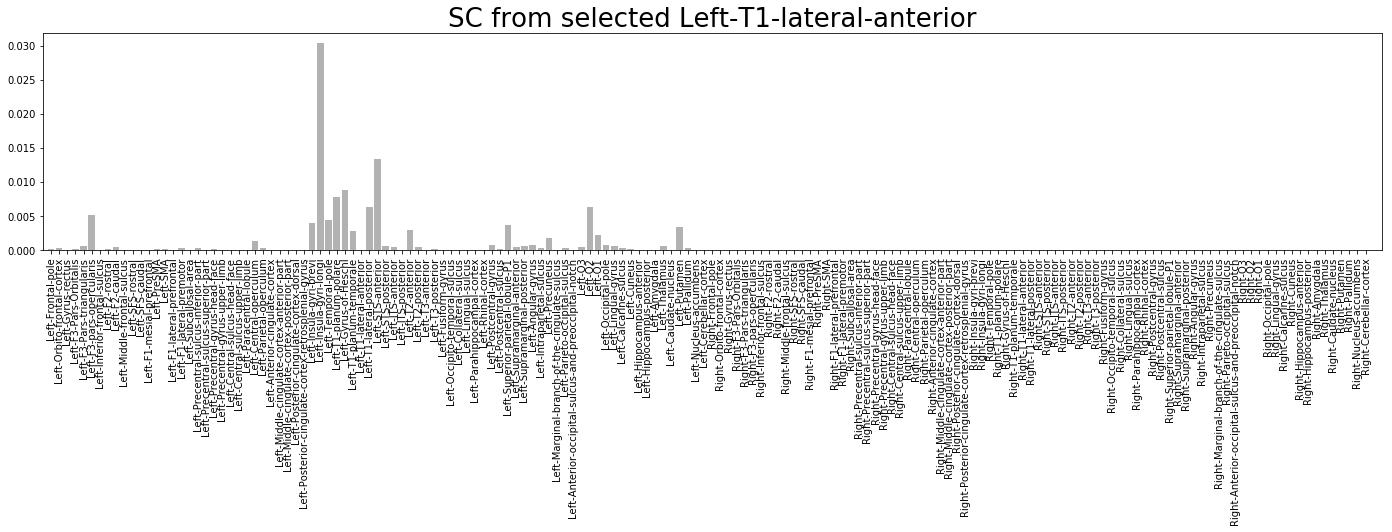

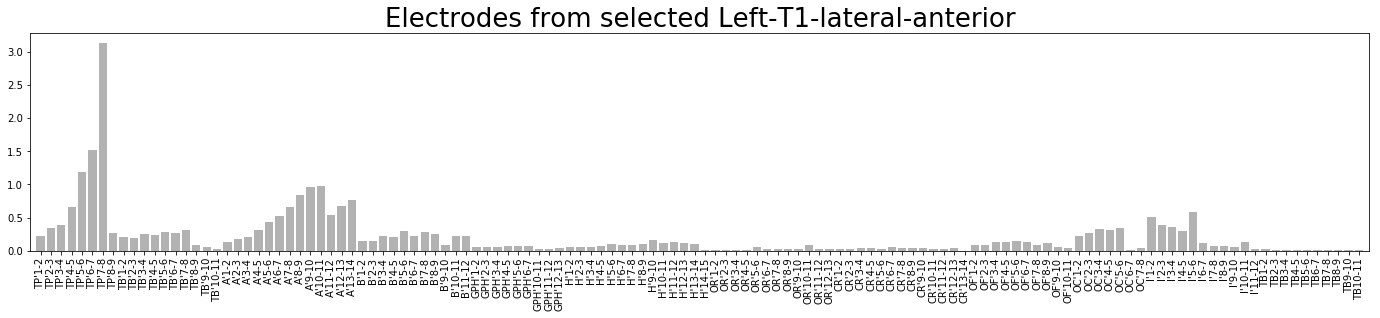

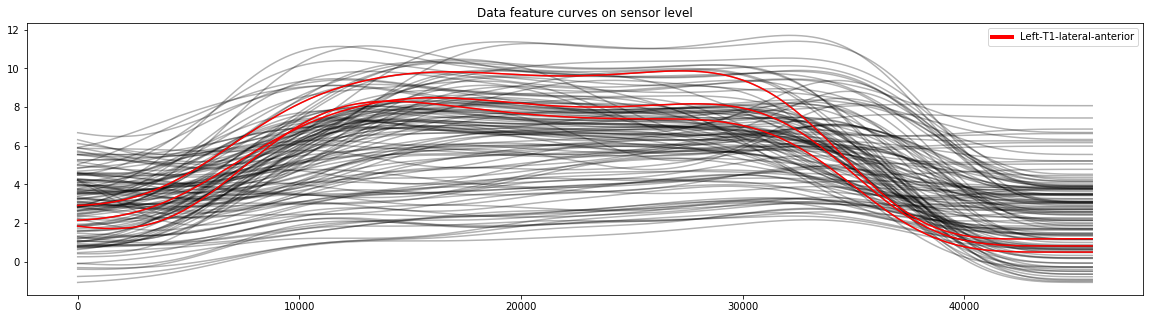

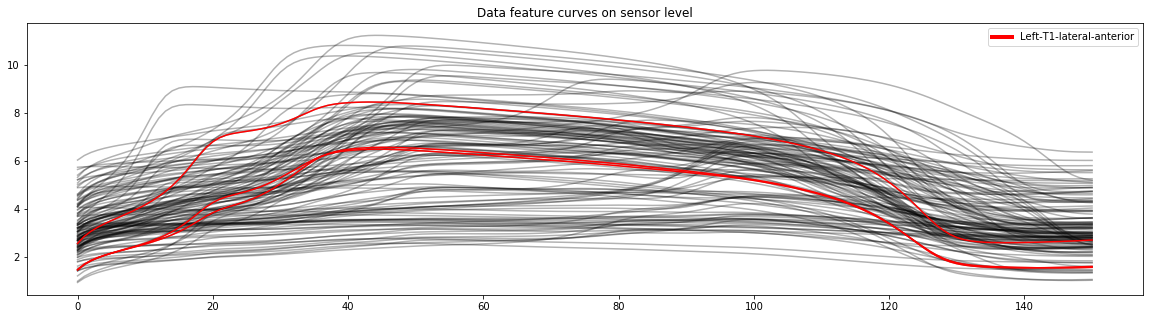

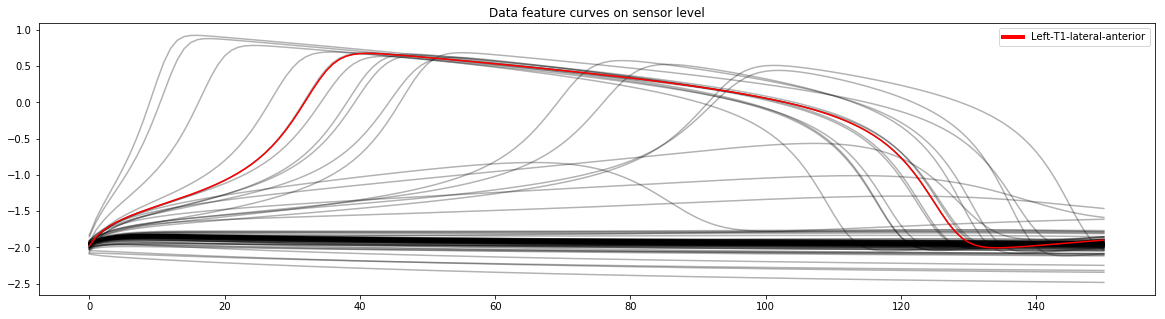

In [23]:
#roi_given = 'Left-SFS-caudal'
roi_given = 'Left-T1-lateral-anterior'
plt.figure(figsize=(24,4))
barlist=plt.bar(np.arange(0, ns), data['SC'][roi.index(roi_given)], color='black', alpha=0.3)
plt.xticks(np.r_[:len(roi)], roi, rotation = 90);
plt.title(f'SC from selected {roi_given}', fontsize = 26);
plt.xlim([-1,163])

plt.figure(figsize=(24,4))
barlist=plt.bar(np.arange(0, len(bip.ch_names)), data['gain'].T[roi.index(roi_given)], color='black', alpha=0.3)
plt.xticks(np.r_[:len(bip.ch_names)], bip.ch_names, rotation = 90);
plt.title(f'Electrodes from selected {roi_given}', fontsize = 26);
plt.xlim([-1,len(bip.ch_names)])

gain_roi_given=data['gain'].T[roi.index(roi_given)]

plt.figure(figsize=(20,5))
ns=162
vep_smax = np.zeros(ns)


plt.plot(slp, color='black', alpha=0.3);

#plt.plot(slp[:,np.argmax(gain_roi_given)],color='red',alpha = 1);
plt.plot(slp[:,np.where(gain_roi_given>1)[0]],color='red',alpha = 1)

plt.legend(handles=legend_elements)
plt.title('Data feature curves on sensor level')
figname=f'{results_dir}/figures/fdfc_A_{fname_suffix}_{add}.png'
plt.savefig(figname)



plt.figure(figsize=(20,5))
ns=162
legend_elements = []
for il, ilabel in enumerate([roi_given]):
    legend_elements.append(Line2D([0], [0], color=color[il], linewidth=4, label=ilabel))
vep_smax = np.zeros(ns)
add='FP'
plt.plot(mu_slp, color='black', alpha=0.3);

plt.plot(mu_slp[:,np.where(gain_roi_given>1)[0]],color='red',alpha = 1);


plt.legend(handles=legend_elements)
plt.title('Data feature curves on sensor level')
figname=f'{results_dir}/figures/fdfc_A_{fname_suffix}_{add}.png'
plt.savefig(figname)

plt.figure(figsize=(20,5))
ns=162
vep_smax = np.zeros(ns)




plt.plot(pstr_samples['x'].mean(axis=0), color='black', alpha=0.3);

plt.plot(pstr_samples['x'].mean(axis=0)[:,roi.index(roi_given)],color='red',alpha = 1);


plt.legend(handles=legend_elements)
plt.title('Data feature curves on sensor level')
figname=f'{results_dir}/figures/fdfc_A_{fname_suffix}_{add}.png'
plt.savefig(figname)

In [ ]:
plt.figure(figsize=(20,5))
ns=162
vep_smax = np.zeros(ns)




plt.plot(pstr_samples['x'].mean(axis=0), color='black', alpha=0.3);

plt.plot(pstr_samples['x'].mean(axis=0)[:,np.where(ez_pred>1)[0]],color='red',alpha = 1);


plt.legend(handles=legend_elements)
plt.title('Data feature curves on sensor level')
figname=f'{results_dir}/figures/fdfc_A_{fname_suffix}_{add}.png'
plt.savefig(figname)